In [18]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import pandas as pd
import copy

In [2]:
# store images in a list
image_path = 'VLINDER_foto'
images = os.listdir(image_path)
image_index= 0
img = cv2.imread(image_path+'/'+images[image_index], 0)


#debug
image_path = "/home/thoverga/Documents/VLINDER_github/VLINDER/rayman_scripts/VLINDER_foto/24_Eeklo_HetLeen.jpg"
img=cv2.imread(image_path)

In [7]:
def plotimg(img):
    plt.imshow(img)
    plt.show()


uint8


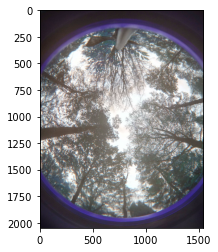

In [3]:
#plot image
print(img.dtype)
plt.imshow(img)
plt.show()

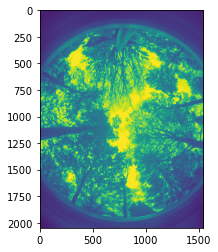

In [29]:
# Read the image, convert it into grayscale, and make in binary image for threshold value of 1.
img = cv2.imread(image_path,0)
plotimg(img)
# keep a copy of original image
original = cv2.imread(image_path)

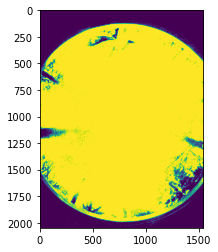

In [55]:
# use binary threshold, all pixel that are beyond 3 are made white
_, thresh_original = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
plotimg(thresh_original)

# Now find contours in it.
thresh = copy.copy(thresh_original)
im2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [66]:
# get contours with highest height
lst_contours = []
for cnt in contours:
    #area = cv2.contourArea(cnt)
    #print(area)
    ctr = cv2.boundingRect(cnt)
    lst_contours.append(ctr)
    


In [67]:
x,y,w,h = sorted(lst_contours, key=lambda coef: coef[3])[-1]

print('x :', x)
print('y :', y)
print('w :', w)
print('h :', h)

x : 0
y : 121
w : 1536
h : 1873


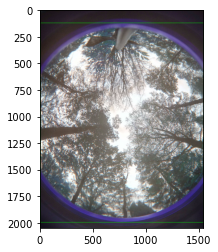

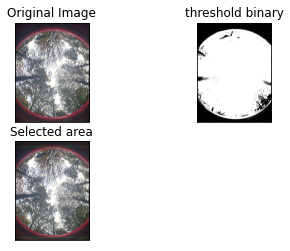

In [69]:
# draw contours
ctr = copy.copy(original)
cv2.rectangle(ctr, (x,y),(x+w,y+h),(0,255,0),2)

plotimg(ctr)
# display results with matplotlib

# original
original = original[:,:,::-1] # flip color for maptolib display
plt.subplot(221), plt.imshow(original)
plt.title('Original Image'), plt.xticks([]),plt.yticks([])

# Threshold
plt.subplot(222), plt.imshow(thresh_original, cmap='gray')
plt.title('threshold binary'), plt.xticks([]),plt.yticks([])

# selected area for future crop
ctr = ctr[:,:,::-1] # flip color for maptolib display
plt.subplot(223), plt.imshow(ctr)
plt.title('Selected area'), plt.xticks([]),plt.yticks([])

plt.show()

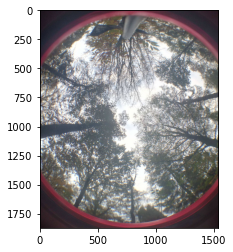

In [71]:
#crop image to boundingbox
cropped_img = original[y:y+h, x:x+w]
plotimg(cropped_img)


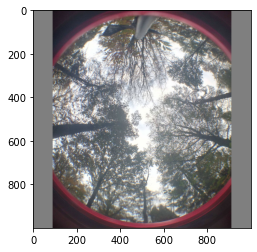

In [75]:
#resize image to square 1000 X 1000
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img


scaled_cropped_img = resizeAndPad(cropped_img, (1000,1000), 127)
plotimg(scaled_cropped_img)

In [76]:
#write to BMP file
cv2.imwrite("firsttest.bmp", scaled_cropped_img)

True